# Principal Component Analysis with Cancer Data

In [198]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file into Python DataFrame and view top 10 rows

In [207]:
df=pd.read_csv('breast-cancer-wisconsin.data.txt',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [208]:
df.columns=['ID_number','clump_thickness','uni_cell_size','uni_cell_shape','marg_adhesion','epithelial_size','bare_nuclei','bland_chromatin','Normal_Nucleoli','mitoses','class']
df.head()

,ID_number,clump_thickness,uni_cell_size,uni_cell_shape,marg_adhesion,epithelial_size,bare_nuclei,bland_chromatin,Normal_Nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [209]:
# To set the ID Number columns as Index for dataset
df.set_index("ID_number", inplace = True) 
df.head()

,clump_thickness,uni_cell_size,uni_cell_shape,marg_adhesion,epithelial_size,bare_nuclei,bland_chromatin,Normal_Nucleoli,mitoses,class
ID_number,,,,,,,,,,
1000025,5,1,1,1,2,1,3,1,1,2
1002945,5,4,4,5,7,10,3,2,1,2
1015425,3,1,1,1,2,2,3,1,1,2
1016277,6,8,8,1,3,4,3,7,1,2
1017023,4,1,1,3,2,1,3,1,1,2


In [210]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [211]:
df.dtypes

clump_thickness     int64
uni_cell_size       int64
uni_cell_shape      int64
marg_adhesion       int64
epithelial_size     int64
bare_nuclei        object
bland_chromatin     int64
Normal_Nucleoli     int64
mitoses             int64
class               int64
dtype: object

In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 1000025 to 897471
Data columns (total 10 columns):
clump_thickness    699 non-null int64
uni_cell_size      699 non-null int64
uni_cell_shape     699 non-null int64
marg_adhesion      699 non-null int64
epithelial_size    699 non-null int64
bare_nuclei        699 non-null object
bland_chromatin    699 non-null int64
Normal_Nucleoli    699 non-null int64
mitoses            699 non-null int64
class              699 non-null int64
dtypes: int64(9), object(1)
memory usage: 60.1+ KB


In [213]:
df.shape

(699, 10)

# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [214]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column

for i in df.columns:
    print(df[i].unique())

[ 5  3  6  4  8  1  2  7 10  9]
[ 1  4  8 10  2  3  7  5  6  9]
[ 1  4  8 10  2  3  5  6  7  9]
[ 1  5  3  8 10  4  6  2  9  7]
[ 2  7  3  1  6  4  5  8 10  9]
['1' '10' '2' '4' '3' '9' '7' '?' '5' '8' '6']
[ 3  9  1  2  4  5  7  8  6 10]
[ 1  2  7  4  5  3 10  6  9  8]
[ 1  5  4  2  3  7 10  8  6]
[2 4]


In [215]:
df.bare_nuclei.unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [216]:
print('?' in df.bare_nuclei)

False


In [217]:
df.bare_nuclei.value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: bare_nuclei, dtype: int64

In [218]:
df.bare_nuclei.value_counts()
print("We have", (df.bare_nuclei == "?").sum(), "?'s that need to be replaced!")

We have 16 ?'s that need to be replaced!


In [219]:
# We will replace ? with '0' so that we can convert the column to a integer using astype()
df.bare_nuclei.replace('?','1' , inplace=True)

In [220]:
df.bare_nuclei.unique()

array(['1', '10', '2', '4', '3', '9', '7', '5', '8', '6'], dtype=object)

In [221]:
df.isna().sum()

clump_thickness    0
uni_cell_size      0
uni_cell_shape     0
marg_adhesion      0
epithelial_size    0
bare_nuclei        0
bland_chromatin    0
Normal_Nucleoli    0
mitoses            0
class              0
dtype: int64

In [222]:
df.bare_nuclei = df.bare_nuclei.astype('int')
df.dtypes

clump_thickness    int64
uni_cell_size      int64
uni_cell_shape     int64
marg_adhesion      int64
epithelial_size    int64
bare_nuclei        int32
bland_chromatin    int64
Normal_Nucleoli    int64
mitoses            int64
class              int64
dtype: object

In [223]:
df.isna().sum().sum()

0

In [224]:
df.isnull().values.any()

False

In [225]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?
df.isnull().sum(axis = 1)

ID_number
1000025    0
1002945    0
1015425    0
1016277    0
1017023    0
1017122    0
1018099    0
1018561    0
1033078    0
1033078    0
1035283    0
1036172    0
1041801    0
1043999    0
1044572    0
1047630    0
1048672    0
1049815    0
1050670    0
1050718    0
1054590    0
1054593    0
1056784    0
1057013    0
1059552    0
1065726    0
1066373    0
1066979    0
1067444    0
1070935    0
          ..
1350423    0
1352848    0
1353092    0
1354840    0
1354840    0
1355260    0
1365075    0
1365328    0
1368267    0
1368273    0
1368882    0
1369821    0
1371026    0
1371920    0
466906     0
466906     0
534555     0
536708     0
566346     0
603148     0
654546     0
654546     0
695091     0
714039     0
763235     0
776715     0
841769     0
888820     0
897471     0
897471     0
Length: 699, dtype: int64

In [226]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
clump_thickness,699.0,4.417740,2.815741,1.0,2.0,4.0,6.0,10.0
uni_cell_size,699.0,3.134478,3.051459,1.0,1.0,1.0,5.0,10.0
uni_cell_shape,699.0,3.207439,2.971913,1.0,1.0,1.0,5.0,10.0
marg_adhesion,699.0,2.806867,2.855379,1.0,1.0,1.0,4.0,10.0
epithelial_size,699.0,3.216023,2.214300,1.0,2.0,2.0,4.0,10.0
bare_nuclei,699.0,3.486409,3.621929,1.0,1.0,1.0,5.0,10.0
bland_chromatin,699.0,3.437768,2.438364,1.0,2.0,3.0,5.0,10.0
Normal_Nucleoli,699.0,2.866953,3.053634,1.0,1.0,1.0,4.0,10.0
mitoses,699.0,1.589413,1.715078,1.0,1.0,1.0,1.0,10.0
class,699.0,2.689557,0.951273,2.0,2.0,2.0,4.0,4.0


In [227]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


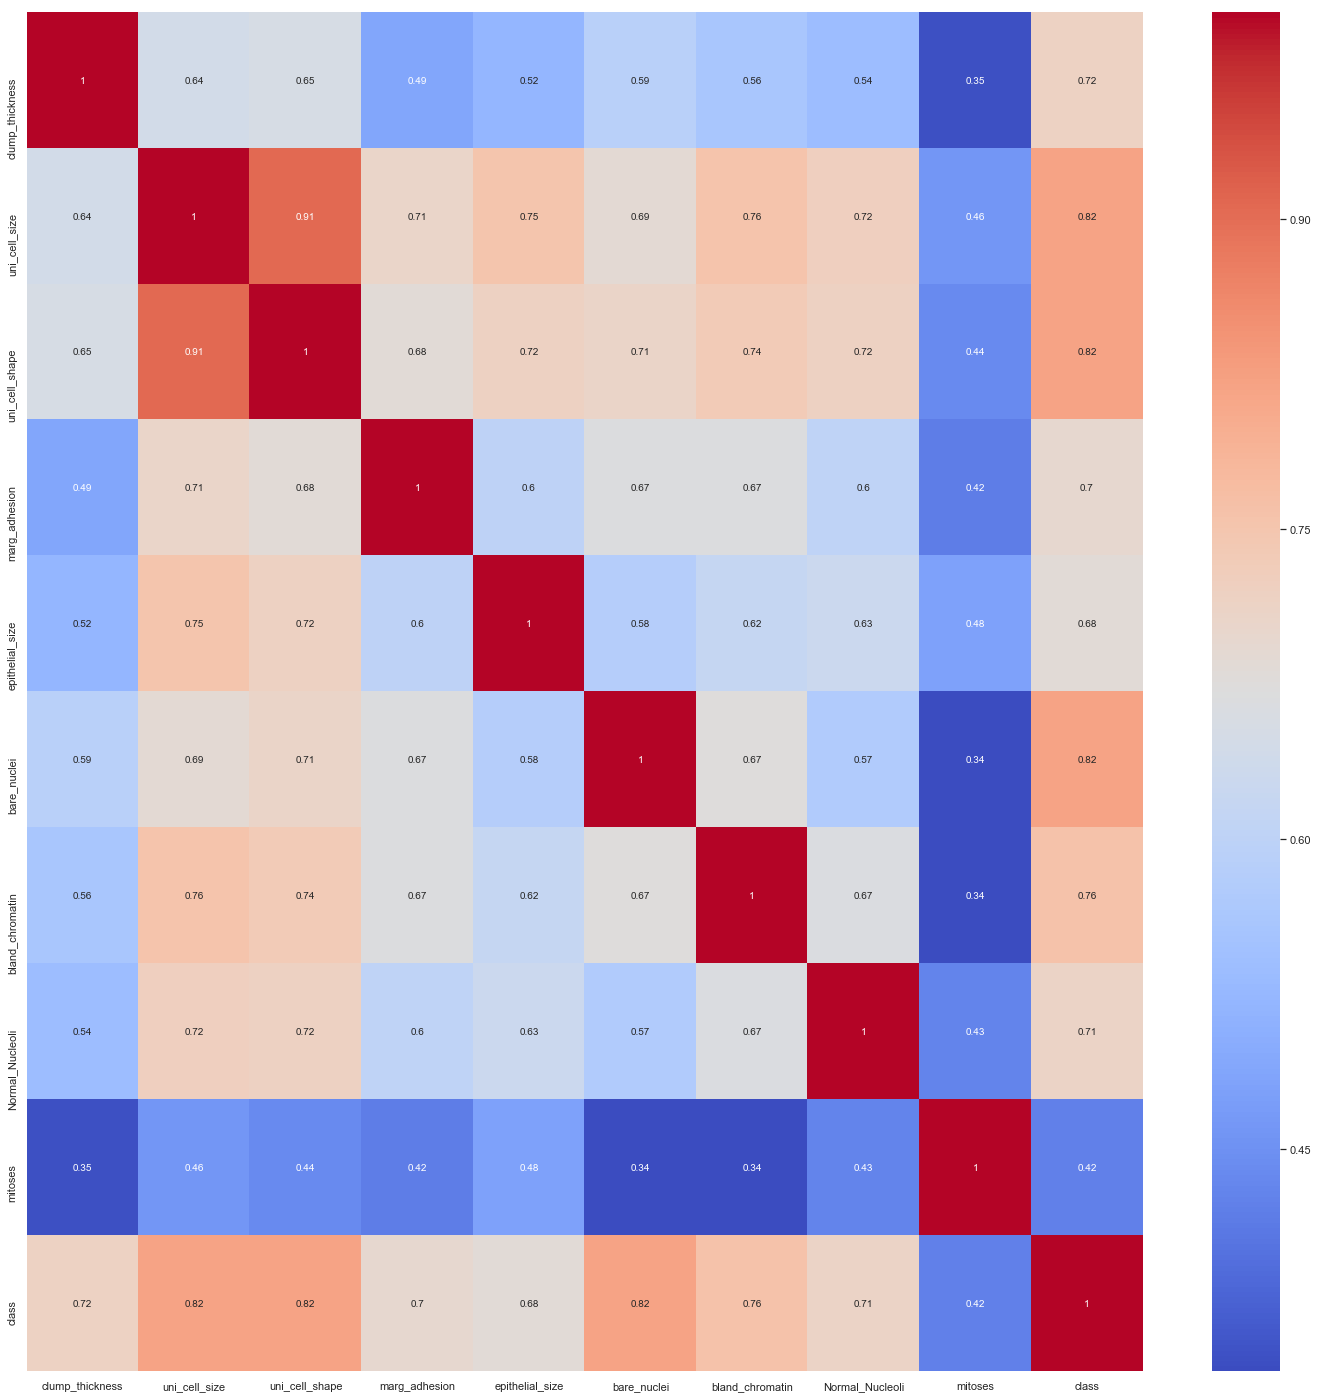

In [228]:
# Check for correlation of variable
corr = df.corr()
fig = plt.figure(figsize = (25,25))
sns.heatmap(corr, annot = True, cmap = "coolwarm")

In [229]:
df.corr()

,clump_thickness,uni_cell_size,uni_cell_shape,marg_adhesion,epithelial_size,bare_nuclei,bland_chromatin,Normal_Nucleoli,mitoses,class
clump_thickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.590008,0.558428,0.535835,0.350034,0.716001
uni_cell_size,0.644913,1.000000,0.906882,0.705582,0.751799,0.686673,0.755721,0.722865,0.458693,0.817904
uni_cell_shape,0.654589,0.906882,1.000000,0.683079,0.719668,0.707474,0.735948,0.719446,0.438911,0.818934
marg_adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.666971,0.666715,0.603352,0.417633,0.696800
epithelial_size,0.521816,0.751799,0.719668,0.599599,1.000000,0.583701,0.616102,0.628881,0.479101,0.682785
bare_nuclei,0.590008,0.686673,0.707474,0.666971,0.583701,1.000000,0.674215,0.574778,0.342397,0.818968
bland_chromatin,0.558428,0.755721,0.735948,0.666715,0.616102,0.674215,1.000000,0.665878,0.344169,0.756616
Normal_Nucleoli,0.535835,0.722865,0.719446,0.603352,0.628881,0.574778,0.665878,1.000000,0.428336,0.712244
mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.342397,0.344169,0.428336,1.000000,0.423170
class,0.716001,0.817904,0.818934,0.696800,0.682785,0.818968,0.756616,0.712244,0.423170,1.000000


In [230]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

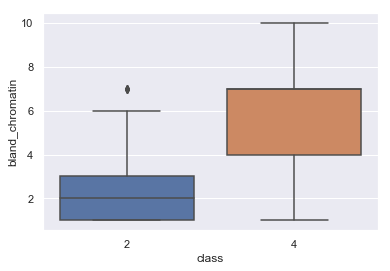

In [231]:
sns.boxplot(data=df,x = 'class', y = 'bland_chromatin');

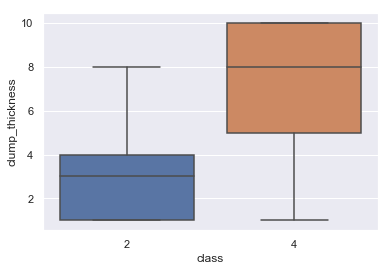

In [232]:
sns.boxplot(data=df,x = 'class', y = 'clump_thickness');

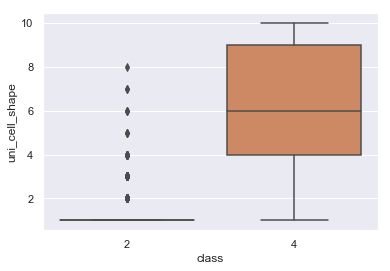

In [233]:
sns.boxplot(data=df,x = 'class', y = 'uni_cell_shape');

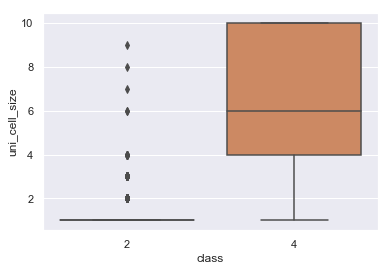

In [234]:
sns.boxplot(data=df,x = 'class', y = 'uni_cell_size');

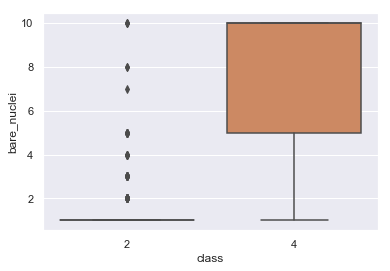

In [235]:
sns.boxplot(data=df,x = 'class', y = 'bare_nuclei');

C:\Users\ABHIJEET\Anaconda4\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


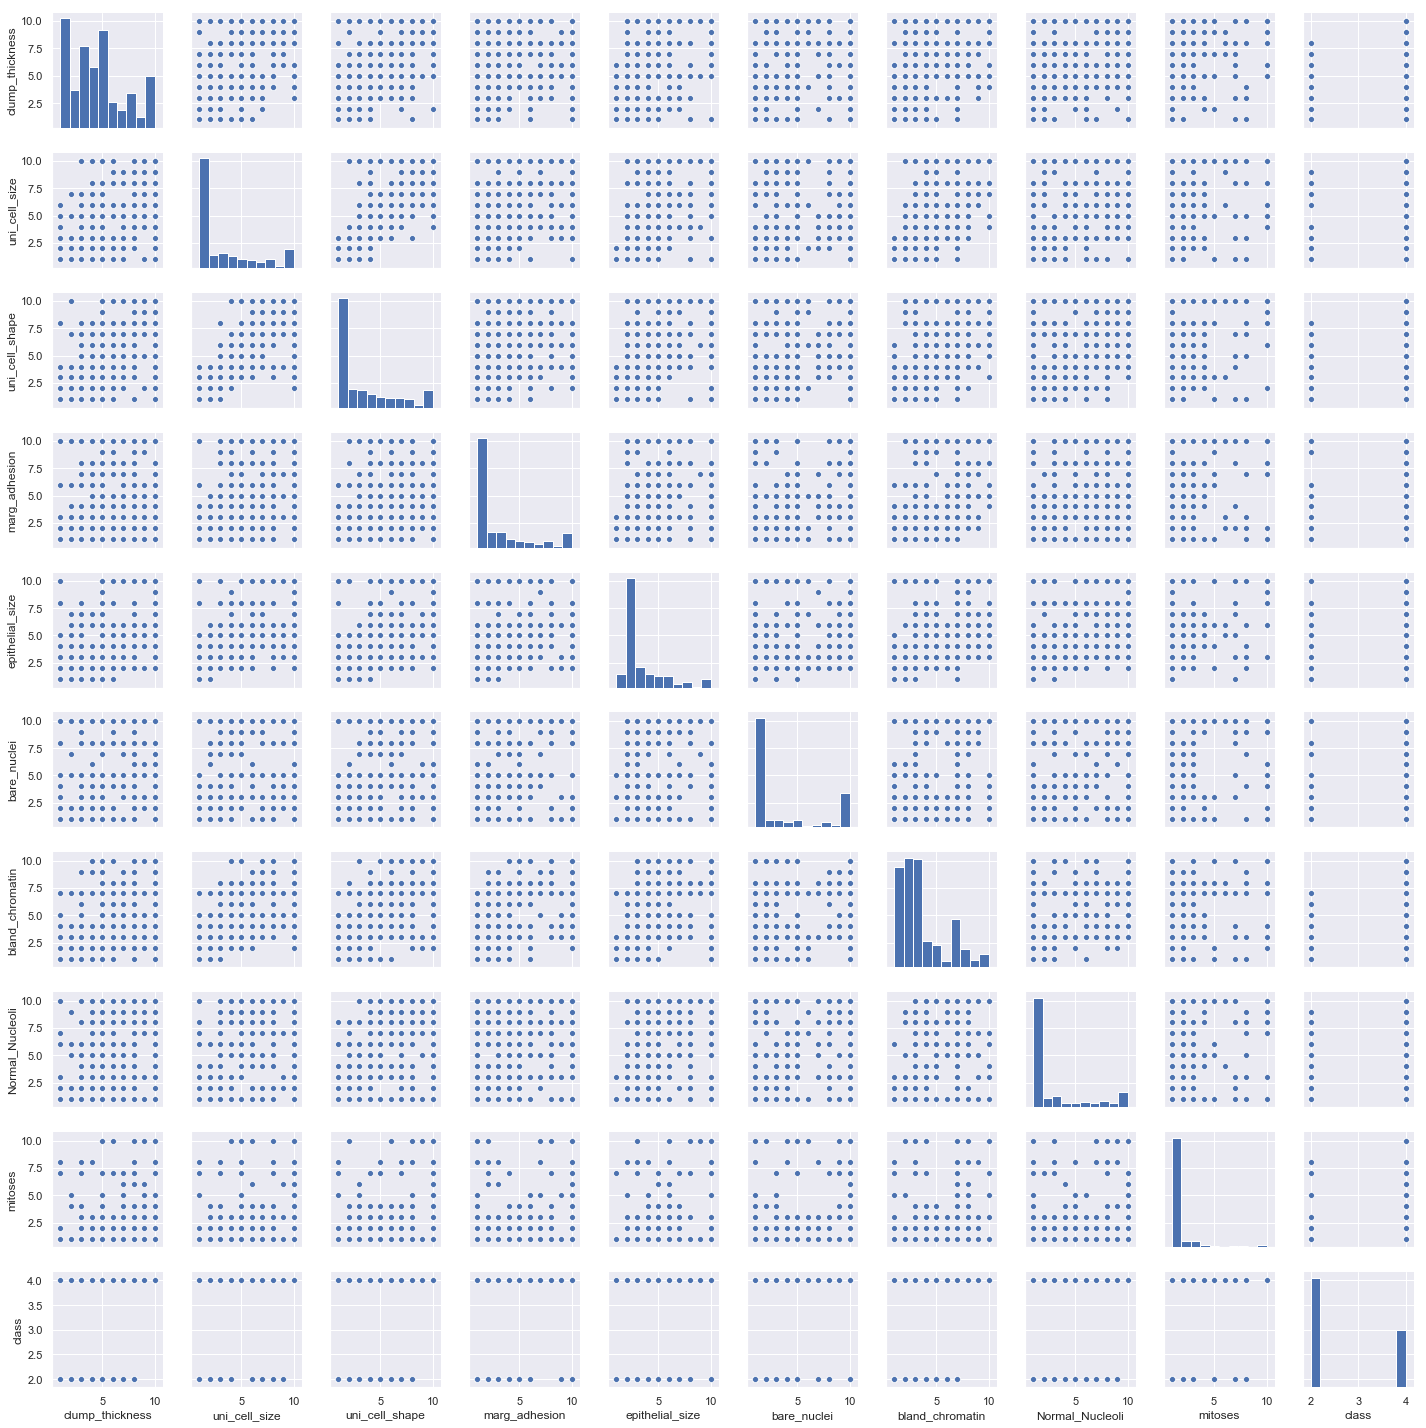

In [236]:
#Let us check for pair plots

sns.set()
sns.pairplot(df, size = 2.0)
plt.show()

In [118]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [238]:
# We could see most of the outliers are now removed.

In [239]:
pd.crosstab(df['mitoses'],df['class'])

class,2,4
mitoses,,
1,445,134
2,8,27
3,2,31
4,0,12
5,1,5
6,0,3
7,1,8
8,1,7
10,0,14


In [240]:
df['mitoses']=np.where(df['mitoses']>=4,3,df['mitoses'])
pd.crosstab(df['mitoses'],df['class'])

class,2,4
mitoses,,
1,445,134
2,8,27
3,5,80


In [241]:
pd.crosstab(df['uni_cell_shape'],df['class'])

class,2,4
uni_cell_shape,,
1,351,2
2,52,7
3,33,23
4,13,31
5,3,31
6,3,27
7,2,28
8,1,27
9,0,7


In [242]:
df['uni_cell_shape']=np.where(df['uni_cell_shape']>=4,3,df['uni_cell_shape'])
pd.crosstab(df['uni_cell_shape'],df['class'])

class,2,4
uni_cell_shape,,
1,351,2
2,52,7
3,55,232


In [243]:
pd.crosstab(df['bare_nuclei'],df['class'])

class,2,4
bare_nuclei,,
1,401,17
2,21,9
3,14,14
4,6,13
5,10,20
6,0,4
7,1,7
8,2,19
9,0,9


In [244]:
df['bare_nuclei']=np.where(df['bare_nuclei']>=4,3,df['bare_nuclei'])
pd.crosstab(df['bare_nuclei'],df['class'])

class,2,4
bare_nuclei,,
1,401,17
2,21,9
3,36,215


In [245]:
pd.crosstab(df['uni_cell_size'],df['class'])

class,2,4
uni_cell_size,,
1,380,4
2,37,8
3,27,25
4,9,31
5,0,30
6,2,25
7,1,18
8,1,28
9,1,5


In [246]:
df['uni_cell_size']=np.where(df['uni_cell_size']>=4,3,df['uni_cell_size'])
pd.crosstab(df['uni_cell_size'],df['class'])

class,2,4
uni_cell_size,,
1,380,4
2,37,8
3,41,229


# Q6 Create a covariance matrix for identifying Principal components

In [247]:
# PCA
# Step 1 - Create covariance matrix


In [248]:
df1=df.drop(columns=['class'])
df1.head()

,clump_thickness,uni_cell_size,uni_cell_shape,marg_adhesion,epithelial_size,bare_nuclei,bland_chromatin,Normal_Nucleoli,mitoses
ID_number,,,,,,,,,
1000025,5,1,1,1,2,1,3,1,1
1002945,5,3,3,5,7,3,3,2,1
1015425,3,1,1,1,2,2,3,1,1
1016277,6,3,3,1,3,3,3,7,1
1017023,4,1,1,3,2,1,3,1,1


In [249]:
df1.T

ID_number,1000025,1002945,1015425,1016277,1017023,1017122,1018099,1018561,1033078,1033078,...,654546,654546,695091,714039,763235,776715,841769,888820,897471,897471
clump_thickness,5,5,3,6,4,8,1,2,2,4,...,1,1,5,3,3,3,2,5,4,4
uni_cell_size,1,3,1,3,1,3,1,1,1,2,...,1,1,3,1,1,1,1,3,3,3
uni_cell_shape,1,3,1,3,1,3,1,2,1,1,...,1,1,3,1,1,1,1,3,3,3
marg_adhesion,1,5,1,1,3,8,1,1,1,1,...,1,3,5,1,1,1,1,3,4,5
epithelial_size,2,7,2,3,2,7,2,2,2,2,...,2,2,4,2,2,3,2,7,3,4
bare_nuclei,1,3,2,3,1,3,3,1,1,1,...,1,1,3,1,1,2,1,3,3,3
bland_chromatin,3,3,3,3,3,9,3,3,1,2,...,1,1,4,1,2,1,1,8,10,10
Normal_Nucleoli,1,2,1,7,1,7,1,1,1,1,...,1,1,4,1,1,1,1,10,6,4
mitoses,1,1,1,1,1,1,1,1,3,1,...,3,1,1,1,2,1,1,2,1,1


In [250]:
from sklearn.preprocessing import StandardScaler
df2 = StandardScaler().fit_transform(df1)

C:\Users\ABHIJEET\Anaconda4\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\ABHIJEET\Anaconda4\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [251]:
import numpy as np
mean_vec = np.mean(df2, axis=0)
cov_mat = (df2 - mean_vec).T.dot((df2 - mean_vec)) / (df2.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[1.00143266 0.66895251 0.64733092 0.48705303 0.52256381 0.59293889
  0.5592282  0.53660222 0.42662567]
 [0.66895251 1.00143266 0.83833541 0.6556429  0.65643255 0.74882351
  0.69680517 0.67652625 0.47336683]
 [0.64733092 0.83833541 1.00143266 0.61022979 0.61419171 0.70612611
  0.65447359 0.63567993 0.42672901]
 [0.48705303 0.6556429  0.61022979 1.00143266 0.60045809 0.61275017
  0.66767051 0.60421681 0.47398946]
 [0.52256381 0.65643255 0.61419171 0.60045809 1.00143266 0.57334457
  0.61698451 0.62978166 0.49557419]
 [0.59293889 0.74882351 0.70612611 0.61275017 0.57334457 1.00143266
  0.64649334 0.59772982 0.44995618]
 [0.5592282  0.69680517 0.65447359 0.66767051 0.61698451 0.64649334
  1.00143266 0.66683179 0.39969991]
 [0.53660222 0.67652625 0.63567993 0.60421681 0.62978166 0.59772982
  0.66683179 1.00143266 0.48706424]
 [0.42662567 0.47336683 0.42672901 0.47398946 0.49557419 0.44995618
  0.39969991 0.48706424 1.00143266]]


In [252]:
print('NumPy covariance matrix: \n%s' %np.cov(df2.T))

NumPy covariance matrix: 
[[1.00143266 0.66895251 0.64733092 0.48705303 0.52256381 0.59293889
  0.5592282  0.53660222 0.42662567]
 [0.66895251 1.00143266 0.83833541 0.6556429  0.65643255 0.74882351
  0.69680517 0.67652625 0.47336683]
 [0.64733092 0.83833541 1.00143266 0.61022979 0.61419171 0.70612611
  0.65447359 0.63567993 0.42672901]
 [0.48705303 0.6556429  0.61022979 1.00143266 0.60045809 0.61275017
  0.66767051 0.60421681 0.47398946]
 [0.52256381 0.65643255 0.61419171 0.60045809 1.00143266 0.57334457
  0.61698451 0.62978166 0.49557419]
 [0.59293889 0.74882351 0.70612611 0.61275017 0.57334457 1.00143266
  0.64649334 0.59772982 0.44995618]
 [0.5592282  0.69680517 0.65447359 0.66767051 0.61698451 0.64649334
  1.00143266 0.66683179 0.39969991]
 [0.53660222 0.67652625 0.63567993 0.60421681 0.62978166 0.59772982
  0.66683179 1.00143266 0.48706424]
 [0.42662567 0.47336683 0.42672901 0.47398946 0.49557419 0.44995618
  0.39969991 0.48706424 1.00143266]]


# Q7 Identify eigen values and eigen vector

In [253]:
# Step 2- Get eigen values and eigen vector

In [254]:
cov_mat = np.cov(df2.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-3.13515961e-01  1.81638473e-01 -6.34581355e-01 -2.69547965e-02
  -2.71871930e-01 -4.82449661e-01  3.47115235e-01 -1.94285187e-01
  -1.96826973e-02]
 [-3.73636313e-01  2.02634409e-01 -1.27131280e-01  8.00187509e-01
   8.39589395e-02  2.36315503e-01 -1.02394222e-01  1.85583778e-01
   2.34633232e-01]
 [-3.57512446e-01  2.71828338e-01 -1.81667812e-01 -5.86727867e-01
   7.73648328e-02  3.12620910e-01 -1.32669701e-01  3.40822260e-01
   4.28442772e-01]
 [-3.29911409e-01 -9.36086929e-02  4.44395723e-01 -2.79760061e-02
   4.48430738e-01 -2.45072844e-01  4.36297174e-01 -2.81853864e-01
   3.91379622e-01]
 [-3.29185561e-01 -1.85794313e-01  2.31729505e-01 -3.51006788e-02
  -5.59219563e-01  5.11783338e-01  4.35170082e-01 -8.76578377e-02
  -1.74588423e-01]
 [-3.44293766e-01  1.78750250e-01 -1.16913207e-01 -1.03263270e-01
   4.48402144e-01  2.63819214e-01 -1.83191488e-01 -4.32446185e-01
  -5.77879110e-01]
 [-3.43249107e-01  1.59067841e-01  3.57781561e-01 -2.88617027e-02
  -1.74465131e

# Q8 Find variance and cumulative variance by each eigen vector

In [255]:
Cum=np.cumsum(eig_vals)
Cum

array([5.79087124, 6.49958385, 7.07469125, 7.2298852 , 7.66282482,
       8.04694411, 8.4204428 , 8.7017301 , 9.01289398])

In [256]:
(Cum/9.01)*100

array([ 64.27160091,  72.13744567,  78.52043562,  80.24289902,
        85.04800018,  89.31125538,  93.45663489,  96.57858048,
       100.03211968])

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [257]:
from sklearn.decomposition import PCA

In [258]:
pca = PCA()
pca.fit(df2)


PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [259]:
pca.components_

array([[ 3.13515961e-01,  3.73636313e-01,  3.57512446e-01,
         3.29911409e-01,  3.29185561e-01,  3.44293766e-01,
         3.43249107e-01,  3.37329798e-01,  2.58716618e-01],
       [-1.81638473e-01, -2.02634409e-01, -2.71828338e-01,
         9.36086929e-02,  1.85794313e-01, -1.78750250e-01,
        -1.59067841e-01,  9.16430470e-02,  8.62044850e-01],
       [ 6.34581355e-01,  1.27131280e-01,  1.81667812e-01,
        -4.44395723e-01, -2.31729505e-01,  1.16913207e-01,
        -3.57781561e-01, -2.50769335e-01,  3.03962535e-01],
       [ 2.71871930e-01, -8.39589395e-02, -7.73648328e-02,
        -4.48430738e-01,  5.59219563e-01, -4.48402144e-01,
         1.74465131e-02,  4.01661484e-01, -1.91138105e-01],
       [-4.82449661e-01,  2.36315503e-01,  3.12620910e-01,
        -2.45072844e-01,  5.11783338e-01,  2.63819214e-01,
        -3.99162885e-01, -2.49381855e-01, -2.36578702e-02],
       [ 3.47115235e-01, -1.02394222e-01, -1.32669701e-01,
         4.36297174e-01,  4.35170082e-01, -1.831914

In [307]:
X_pca = pca.transform(df2)

In [308]:
X_pca.shape

(699, 7)

In [309]:
pca.explained_variance_

array([5.79087124, 0.70871261, 0.57510739, 0.43293961, 0.38411929,
       0.37349869, 0.31116388])

In [310]:
pca.explained_variance_ratio_

array([0.64250964, 0.07863319, 0.0638094 , 0.04803558, 0.04261886,
       0.04144048, 0.0345243 ])

In [311]:
np.cumsum(pca.explained_variance_ratio_)

array([0.64250964, 0.72114283, 0.78495223, 0.83298781, 0.87560668,
       0.91704716, 0.95157147])

In [312]:
pca = PCA(n_components=7)
pca.fit(df2)

PCA(copy=True, iterated_power='auto', n_components=7, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [313]:
pca.components_

array([[ 3.13515961e-01,  3.73636313e-01,  3.57512446e-01,
         3.29911409e-01,  3.29185561e-01,  3.44293766e-01,
         3.43249107e-01,  3.37329798e-01,  2.58716618e-01],
       [-1.81638473e-01, -2.02634409e-01, -2.71828338e-01,
         9.36086929e-02,  1.85794313e-01, -1.78750250e-01,
        -1.59067841e-01,  9.16430470e-02,  8.62044850e-01],
       [ 6.34581355e-01,  1.27131280e-01,  1.81667812e-01,
        -4.44395723e-01, -2.31729505e-01,  1.16913207e-01,
        -3.57781561e-01, -2.50769335e-01,  3.03962535e-01],
       [ 2.71871930e-01, -8.39589395e-02, -7.73648328e-02,
        -4.48430738e-01,  5.59219563e-01, -4.48402144e-01,
         1.74465131e-02,  4.01661484e-01, -1.91138105e-01],
       [-4.82449661e-01,  2.36315503e-01,  3.12620910e-01,
        -2.45072844e-01,  5.11783338e-01,  2.63819214e-01,
        -3.99162885e-01, -2.49381855e-01, -2.36578702e-02],
       [ 3.47115235e-01, -1.02394222e-01, -1.32669701e-01,
         4.36297174e-01,  4.35170082e-01, -1.831914

In [314]:
pca.explained_variance_

array([5.79087124, 0.70871261, 0.57510739, 0.43293961, 0.38411929,
       0.37349869, 0.31116388])

In [315]:
pca.explained_variance_ratio_

array([0.64250964, 0.07863319, 0.0638094 , 0.04803558, 0.04261886,
       0.04144048, 0.0345243 ])

# Q10 Find correlation between components and features

In [316]:
corr_df = pd.DataFrame(pca.components_)

corr_df

,0,1,2,3,4,5,6,7,8
0,0.313516,0.373636,0.357512,0.329911,0.329186,0.344294,0.343249,0.337330,0.258717
1,-0.181638,-0.202634,-0.271828,0.093609,0.185794,-0.178750,-0.159068,0.091643,0.862045
2,0.634581,0.127131,0.181668,-0.444396,-0.231730,0.116913,-0.357782,-0.250769,0.303963
3,0.271872,-0.083959,-0.077365,-0.448431,0.559220,-0.448402,0.017447,0.401661,-0.191138
4,-0.482450,0.236316,0.312621,-0.245073,0.511783,0.263819,-0.399163,-0.249382,-0.023658
5,0.347115,-0.102394,-0.132670,0.436297,0.435170,-0.183191,-0.000438,-0.653939,-0.102480
6,-0.019683,0.234633,0.428443,0.391380,-0.174588,-0.577879,-0.457553,0.179623,-0.042116


# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

# Q11 Read the dataset(jokes.csv)

Take care about the header in read_csv() as there are no column names given in the dataset. 

In [321]:
movie = pd.read_csv('jokes.csv')
movie.head()

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [323]:
movie.shape

(24983, 101)

# Q12 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [324]:
ratings=movie.head(200)
ratings.head()

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [325]:
ratings=ratings.drop(columns=['NumJokes'])
ratings.head()

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q13 Change the column indices from 0 to 99

In [274]:
L=range(0,100)
ratings.columns=L
ratings.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q14 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [275]:
ratings.replace(99.00, 0, inplace=True)
ratings.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,0.00,...,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,1.84,...,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q15 Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

In [302]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(ratings)
rating_diff=pd.DataFrame(scaler.transform(ratings),columns=ratings.columns)

### Popularity based recommendation system

# Q16  Find the mean for each column  in `ratings_diff` i.e, for each joke

In [305]:
rating_diff.shape

(200, 100)

In [306]:
mean_ratings=rating_diff.mean(axis=0)
mean_ratings

0    -1.110223e-17
1    -9.658940e-17
2    -4.107825e-17
3     3.719247e-17
4    -8.881784e-18
5    -2.636780e-18
6    -1.665335e-18
7     2.331468e-17
8    -4.329870e-17
9    -2.553513e-17
10   -4.551914e-17
11   -8.604228e-17
12    6.661338e-17
13    5.467848e-17
14   -2.164935e-17
15   -1.065814e-16
16    1.637579e-17
17    2.331468e-17
18   -9.159340e-18
19    2.997602e-17
20    1.065814e-16
21    1.720846e-17
22   -2.775558e-17
23    4.329870e-17
24   -3.885781e-17
25   -1.498801e-17
26   -3.996803e-17
27   -9.436896e-18
28   -5.273559e-17
29    1.998401e-17
          ...     
70    7.632783e-19
71   -9.325873e-17
72   -4.024558e-17
73    7.743806e-17
74    1.290634e-17
75    3.885781e-17
76    3.747003e-18
77   -2.886580e-17
78   -9.853229e-18
79   -6.938894e-17
80    3.941292e-17
81    1.243450e-16
82    0.000000e+00
83    2.498002e-17
84   -2.045586e-16
85   -1.290634e-17
86   -8.465451e-17
87    5.107026e-17
88    2.997602e-17
89   -6.369905e-17
90   -4.385381e-17
91   -3.4972

In [293]:
n=pd.DataFrame(mean_ratings)
n.head()

,0
0,-1.110223e-17
1,-9.658940e-17
2,-4.107825e-17
3,3.719247e-17
4,-8.881784e-18


In [291]:
n.columns=['Top_JOKES']
n.head()

,Top_JOKES
0,-1.110223e-17
1,-9.658940e-17
2,-4.107825e-17
3,3.719247e-17
4,-8.881784e-18


# Q17 Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [289]:
n.nlargest(10,['Top_JOKES']) 

,Top_JOKES
98,1.840889e-16
81,1.243450e-16
97,1.198694e-16
20,1.065814e-16
94,1.054712e-16
92,8.770762e-17
47,7.771561e-17
73,7.743806e-17
99,7.549517e-17
49,7.494005e-17
